### Imports

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Data 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))


X_train[X_train <= 126] = 0
X_train[X_train > 126] = 1

X_test[X_test <= 126] = 0
X_test[X_test > 126] = 1

### shuffling the data
np.random.shuffle(X_train)

### Utils 

In [310]:
def get_hidden(visible, W, c):
    
    z = np.dot(visible, W) + c
    p_h =  1/(1 + np.exp(-z))
    
    return np.round(p_h)
    

In [311]:
def get_visible(hidden, W, b):
    
    z = np.dot(W, hidden.T).T + b
    p_v =  1/(1 + np.exp(-z)) 
    
    return np.round(p_v)


In [319]:
def get_product_ph_v(v, W, c):
    
    p_h = get_hidden(v, W, c).reshape(-1, 1)
    v = v.reshape(1, -1)
    
    prod = np.dot(p_h, v)
    
    return prod.T
    

In [314]:
def get_gibbs_sample(v_in, params, k = 1):
    v = v_in.copy()
    W, c, b = params
    
    for i in range(k):
        h0 = get_hidden(v, W, c)
        v = get_visible(h0, W, b)
    
    return v

In [315]:
def reconstruct_from_image(img, n_iter, params):
    
    v = img.copy()
    W, c, b = params
    for _ in range(n_iter):
        
        h0 = get_hidden(v, W, c)
        v = get_visible(h0, W, b)
    
    
    return v.reshape(28, 28)
    

In [236]:
def remove_pixels(img, fraction):
    
    total_pixels = img.shape[0]
    num_removed = round(0.2 * total_pixels)
    
    remove_idxs = np.random.choice(np.arange(total_pixels), num_removed, replace = False)
    img =img.astype('float32')
    img[remove_idxs] = 0

    return img
    

In [321]:
def generate_from_train_images(params, num_samples):
    
    ## sample train images

    sample_idxs = np.random.choice(np.arange(X_train.shape[0]), num_samples, replace = False)
    samples = X_train[sample_idxs,:]

    plt.figure(figsize = (10,10))

    for i, sample in enumerate(samples):

        img = reconstruct_from_image(sample, 1, params)

        plt.subplot(4,4,i+1)
        plt.imshow(img.reshape(28,28))
    

In [317]:
def generate_from_test_images(params, num_samples, fraction_removed):
    
    sample_idxs = np.random.choice(np.arange(X_test.shape[0]), num_samples, replace = False)
    samples = X_test[sample_idxs]
    samples_pixels_removed = np.apply_along_axis(remove_pixels ,1, samples, fraction = fraction_removed)

    plt.figure(figsize = (10, 10))

    for i, sample in enumerate(samples_pixels_removed):

        img = reconstruct_from_image(sample, 1, params)

        plt.subplot(4,4,i+1)
        plt.imshow(img.reshape(28,28))
    

In [316]:
def train_rbm(n_hidden):
    
    # initializing the weight and biases 
   
    W = np.random.rand(784, n_hidden)
    b = np.random.rand(784)
    c = np.random.rand(n_hidden)

    ## Training Loop

    start = 0
    for i in range(batch_size, len(X_train), batch_size ):

        X_batch = X_train[start:i].copy()
        start = i

        del_w = np.zeros((784, n_hidden))
        del_b = np.zeros_like(b)
        del_c = np.zeros_like(c)

        for v in X_batch:

            v1 = get_gibbs_sample(v, (W, c, b))

            
            del_w = del_w + get_product_ph_v(v, W, c) - get_product_ph_v(v1, W, c)
            del_b = del_b + v - v1
            del_c = del_c + get_hidden(v, W, c) - get_hidden(v1, W, c) 


        W = W + (learning_rate/batch_size) * del_w
        b = b + (learning_rate/batch_size) * del_b
        c = c + (learning_rate/batch_size) * del_c
        
    
    return W, c, b

### Training 20 Hidden Nodes

In [528]:
batch_size = 16
learning_rate = 0.0266

n_hidden = 20

params = train_rbm(n_hidden)

####  Generate using train images

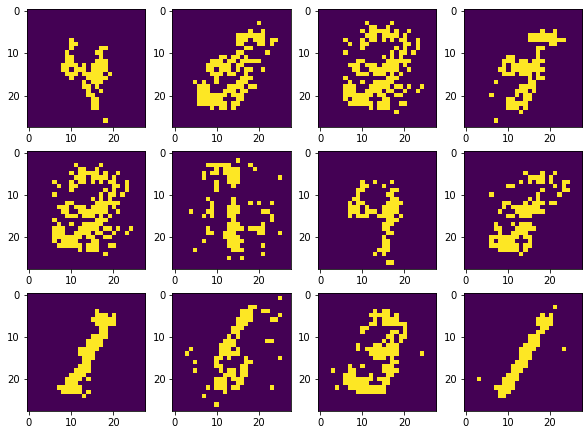

In [527]:
generate_from_train_images(params, 12)

#### Generate using test images 

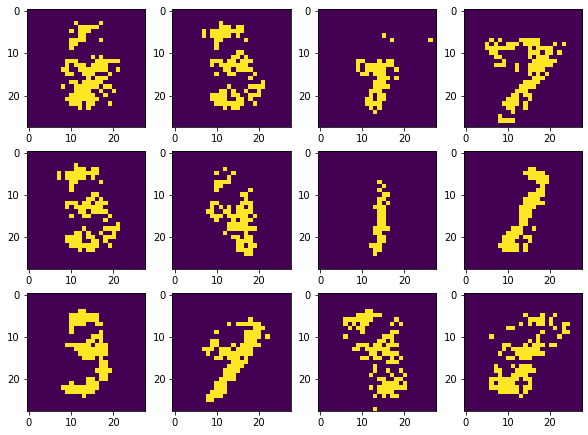

In [520]:
## 12 sample test images with 20% pixels removed
generate_from_test_images(params, 12, 0.2)

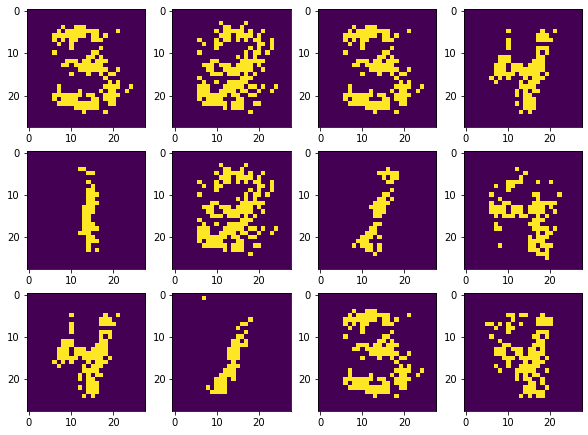

In [521]:
## 12 sample test images with 50% pixels removed
generate_from_test_images(params, 12, 0.5)

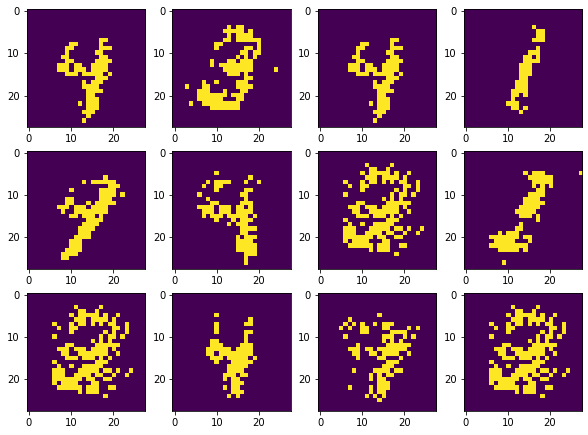

In [526]:
## 12 sample test images with 80% pixels removed
generate_from_test_images(params, 12, 0.8)

### Training 100 Hidden Nodes 

In [380]:
batch_size = 16
learning_rate = 0.027

n_hidden = 100

params = train_rbm(n_hidden)

####  Generate using train images

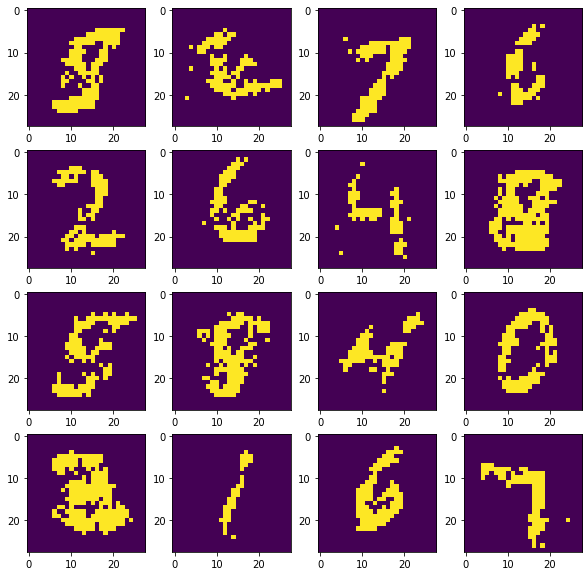

In [384]:
generate_from_train_images(params, 16)

#### Generate using test images 

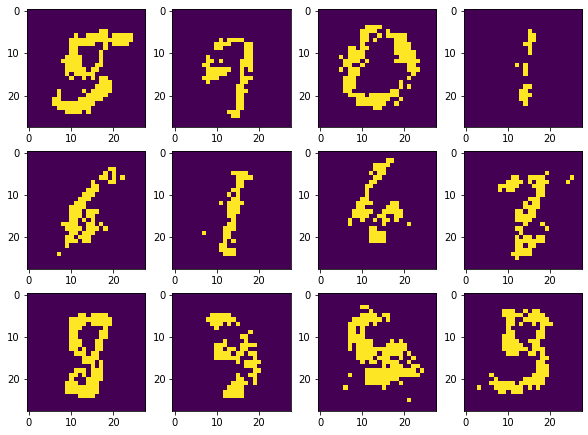

In [387]:
## 12 sample test images with 20% pixels removed
generate_from_test_images(params, 12, 0.2)

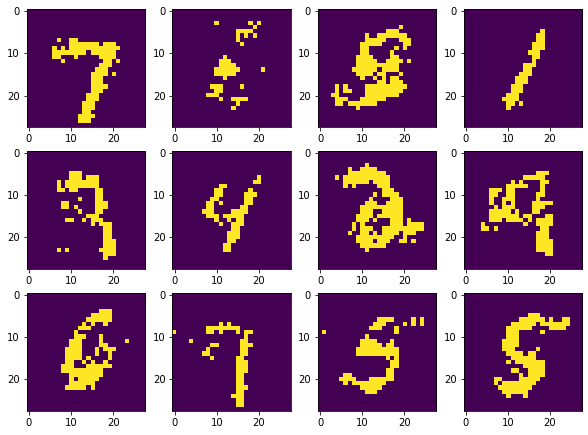

In [388]:
## 12 sample test images with 50% pixels removed
generate_from_test_images(params, 12, 0.5)

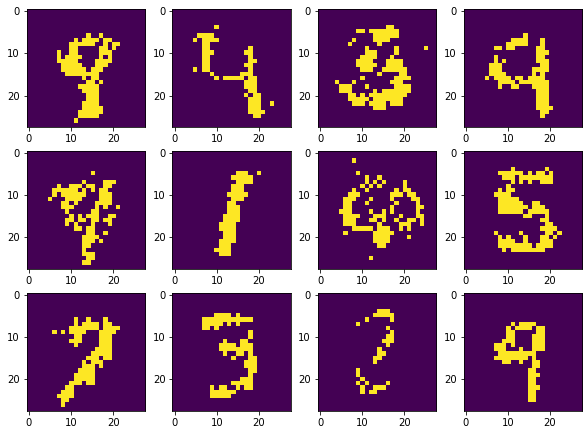

In [390]:
## 12 sample test images with 80% pixels removed
generate_from_test_images(params, 12, 0.8)

###  Training 500 Hidden Nodes

In [320]:
batch_size = 16
learning_rate = 0.027

n_hidden = 500

params = train_rbm(n_hidden)

#### Generate using train images

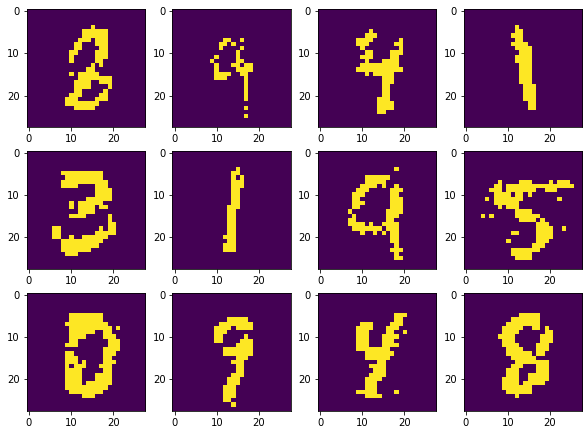

In [328]:
generate_from_train_images(params, 12)

#### Generate using test images 

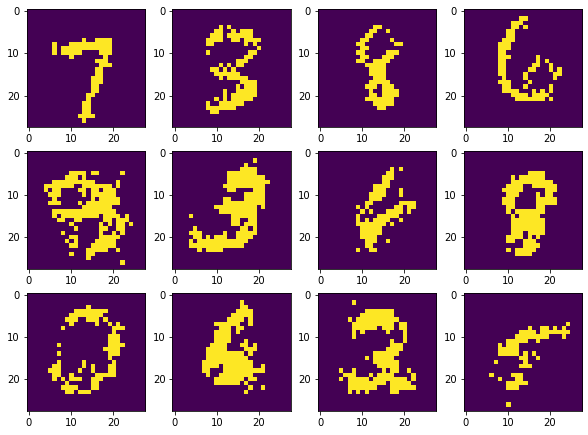

In [330]:
## 12 sample test images with 20% pixels removed
generate_from_test_images(params, 12, 0.2)

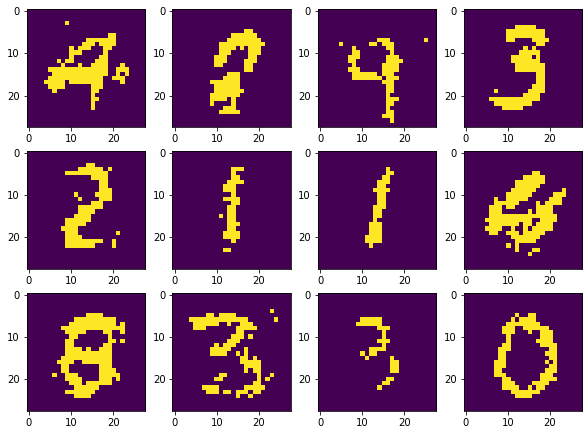

In [334]:
## 12 sample test images with 50% pixels removed
generate_from_test_images(params, 12, 0.5)

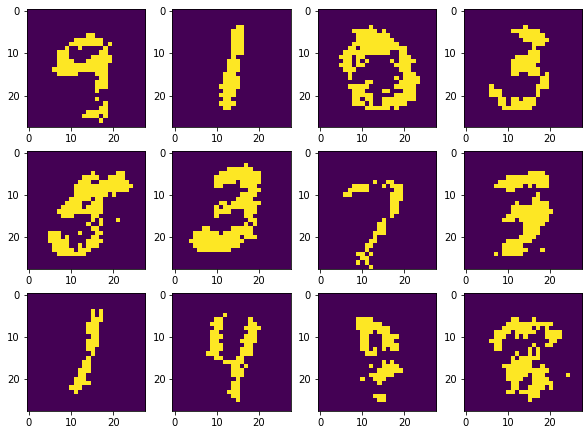

In [349]:
## 12 sample test images with 80% pixels removed
generate_from_test_images(params, 12, 0.8)